<a href="https://colab.research.google.com/github/elenasofia98/PracticalNLP-2023-2024/blob/main/HoL02_1_ParsingWithStanza_ParaphraseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanza's basics

In [46]:
# https://stanfordnlp.github.io/stanza/

**Stanza** is a Python natural language analysis package. It contains tools, which can be used in a pipeline, to convert a string containing human language text into lists of sentences and words, to generate base forms of those words, their parts of speech and morphological features, to give a syntactic structure **dependency parse**, and to recognize named entities. The toolkit is designed to be parallel among more than 70 languages, using the Universal Dependencies formalism.


Stanza is built with highly accurate neural network components

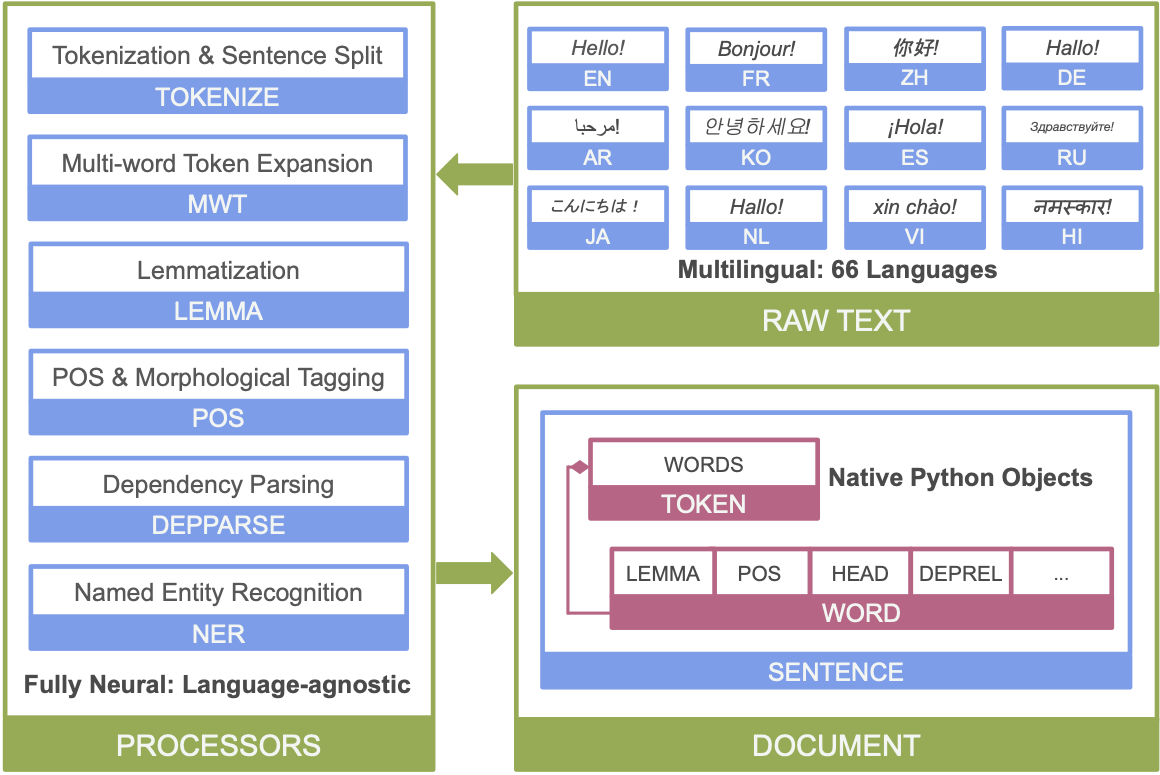

In [47]:
!pip install stanza

In [48]:
import stanza
stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline

INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [49]:
en_document = "Chris Manning teaches at Stanford University. He is the founder of the Stanford NLP group and manages development of the Stanford CoreNLP and Stanza software."
doc = nlp(en_document)

In [50]:
sent_list = [sent.text for sent in doc.sentences]
sent_list

['Chris Manning teaches at Stanford University.',
 'He is the founder of the Stanford NLP group and manages development of the Stanford CoreNLP and Stanza software.']

In [51]:
word_tokens = [token for sent in doc.sentences for token in sent.tokens]
[token.text for token in word_tokens]

['Chris',
 'Manning',
 'teaches',
 'at',
 'Stanford',
 'University',
 '.',
 'He',
 'is',
 'the',
 'founder',
 'of',
 'the',
 'Stanford',
 'NLP',
 'group',
 'and',
 'manages',
 'development',
 'of',
 'the',
 'Stanford',
 'CoreNLP',
 'and',
 'Stanza',
 'software',
 '.']

In [52]:
print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}' for sent in doc.sentences for word in sent.words], sep='\n')#\tfeats: {word.feats if word.feats else "_"}

word: Chris	upos: PROPN	xpos: NNP
word: Manning	upos: PROPN	xpos: NNP
word: teaches	upos: VERB	xpos: VBZ
word: at	upos: ADP	xpos: IN
word: Stanford	upos: PROPN	xpos: NNP
word: University	upos: PROPN	xpos: NNP
word: .	upos: PUNCT	xpos: .
word: He	upos: PRON	xpos: PRP
word: is	upos: AUX	xpos: VBZ
word: the	upos: DET	xpos: DT
word: founder	upos: NOUN	xpos: NN
word: of	upos: ADP	xpos: IN
word: the	upos: DET	xpos: DT
word: Stanford	upos: PROPN	xpos: NNP
word: NLP	upos: PROPN	xpos: NNP
word: group	upos: NOUN	xpos: NN
word: and	upos: CCONJ	xpos: CC
word: manages	upos: VERB	xpos: VBZ
word: development	upos: NOUN	xpos: NN
word: of	upos: ADP	xpos: IN
word: the	upos: DET	xpos: DT
word: Stanford	upos: PROPN	xpos: NNP
word: CoreNLP	upos: PROPN	xpos: NNP
word: and	upos: CCONJ	xpos: CC
word: Stanza	upos: PROPN	xpos: NNP
word: software	upos: NOUN	xpos: NN
word: .	upos: PUNCT	xpos: .


In [53]:
# NB sent.tokens != sent.words
doc.sentences[0].tokens[0], doc.sentences[0].words[0]

([
   {
     "id": 1,
     "text": "Chris",
     "lemma": "Chris",
     "upos": "PROPN",
     "xpos": "NNP",
     "feats": "Number=Sing",
     "head": 3,
     "deprel": "nsubj",
     "start_char": 0,
     "end_char": 5,
     "ner": "B-PERSON",
     "multi_ner": [
       "B-PERSON"
     ]
   }
 ],
 {
   "id": 1,
   "text": "Chris",
   "lemma": "Chris",
   "upos": "PROPN",
   "xpos": "NNP",
   "feats": "Number=Sing",
   "head": 3,
   "deprel": "nsubj",
   "start_char": 0,
   "end_char": 5
 })

https://universaldependencies.org/u/overview/tokenization.html


The UD annotation is based on a lexicalist view of syntax, which means that **dependency relations hold between words**.

Hence, **morphological features are encoded as properties of words** and there is no attempt at segmenting words into morphemes.

However, it is important to note that **the basic units of annotation are syntactic words (not phonological or orthographic words)**, which means that we systematically want to split off clitics:

*   as in Spanish dámelo = da me lo
*   as in French au = à le

We refer to such cases as multiword tokens because a single orthographic token corresponds to multiple (syntactic) words.


In exceptional cases, it may be necessary to go in the other direction, and combine several orthographic tokens into a single syntactic word. Starting from v2 of the UD guidelines, such multitoken words are allowed for a restricted class of phenomena, such as numerical expressions like 20 000 and abbreviations like e. g., as long as these phenomena are approved and clearly specified in the language-specific documentation.

In [54]:
# Multi-Word Token (MWT) Expansion

fr = stanza.Pipeline(lang='fr', processors='tokenize,mwt')
doc_fr = fr('Nous avons atteint la fin du sentier.')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


In [55]:
for token in doc_fr.sentences[0].tokens:
    print(f'token: {token.text}\twords: {", ".join([word.text for word in token.words])}')

token: Nous	words: Nous
token: avons	words: avons
token: atteint	words: atteint
token: la	words: la
token: fin	words: fin
token: du	words: de, le
token: sentier	words: sentier
token: .	words: .


In [56]:
doc_fr.sentences[0].tokens[5], doc_fr.sentences[0].words[5:7]

([
   {
     "id": [
       6,
       7
     ],
     "text": "du",
     "start_char": 26,
     "end_char": 28
   },
   {
     "id": 6,
     "text": "de"
   },
   {
     "id": 7,
     "text": "le"
   }
 ],
 [{
    "id": 6,
    "text": "de"
  },
  {
    "id": 7,
    "text": "le"
  }])

In [57]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\tdeprel: {word.deprel}' for sent in doc.sentences for word in sent.words], sep='\n')

id: 1	word: Chris	head id: 3	deprel: nsubj
id: 2	word: Manning	head id: 1	deprel: flat
id: 3	word: teaches	head id: 0	deprel: root
id: 4	word: at	head id: 6	deprel: case
id: 5	word: Stanford	head id: 6	deprel: compound
id: 6	word: University	head id: 3	deprel: obl
id: 7	word: .	head id: 3	deprel: punct
id: 1	word: He	head id: 4	deprel: nsubj
id: 2	word: is	head id: 4	deprel: cop
id: 3	word: the	head id: 4	deprel: det
id: 4	word: founder	head id: 0	deprel: root
id: 5	word: of	head id: 9	deprel: case
id: 6	word: the	head id: 9	deprel: det
id: 7	word: Stanford	head id: 9	deprel: compound
id: 8	word: NLP	head id: 9	deprel: compound
id: 9	word: group	head id: 4	deprel: nmod
id: 10	word: and	head id: 11	deprel: cc
id: 11	word: manages	head id: 4	deprel: conj
id: 12	word: development	head id: 11	deprel: obj
id: 13	word: of	head id: 19	deprel: case
id: 14	word: the	head id: 19	deprel: det
id: 15	word: Stanford	head id: 19	deprel: compound
id: 16	word: CoreNLP	head id: 19	deprel: compound
id: 1

# Recognizing Paraphrases

In [58]:
nlp = stanza.Pipeline('en', processors='tokenize,lemma,pos,depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


https://aclanthology.org/P09-3004.pdf

Recognizing or generating semantically equivalent phrases is of significant importance in many
natural language applications. In question answering, for example, a question may be phrased differently than in a document collection n (e.g., “Who
is the author of War and Peace?” vs. “Leo Tolstoy is the writer of War and Peace.”)


Paraphrase recognizers decide whether or not two given phrases
(or patterns) are paraphrases

Note that, although “paraphrasing” and “textual
entailment” are sometimes used as synonyms, we
use the former to refer to methods that generate
or recognize semantically equivalent (or almost
equivalent) phrases or patterns, whereas in textual
entailment the expressions or
patterns are not necessarily semantically equivalent; it suffices if one entails the other, even if the
reverse direction does not hold.


For example, “Y
was written by X” textually entails “Y is the work
of X”, but the reverse direction does not necessarily hold (e.g., if Y is a statue); hence, the two
sentences are not paraphrases.


https://web.archive.org/web/20171209091513/http://www.jair.org/media/2985/live-2985-5001-jair.pdf

Instead of showing hierarchically the
syntactic constituents (e.g., noun phrases, verb phrases) of a sentence, the output of a dependency
grammar parser is a graph (usually a tree) whose nodes are the words of the sentence and whose
(labeled) edges correspond to syntactic dependencies between words, for example the dependency
between a verb and the head noun of its subject noun phrase, or the dependency between a noun
and an adjective that modifies it.


In [59]:
s1 = "A mathematician solved the problem"
s2 = "The problem was solved by a young mathematician"

sp1 = nlp(s1)
sp2 = nlp(s2)

In [60]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\tdeprel: {word.deprel}' for sent in sp1.sentences for word in sent.words], sep='\n')

id: 1	word: A	head id: 2	deprel: det
id: 2	word: mathematician	head id: 3	deprel: nsubj
id: 3	word: solved	head id: 0	deprel: root
id: 4	word: the	head id: 5	deprel: det
id: 5	word: problem	head id: 3	deprel: obj


In [61]:
print(*[f'id: {word.id}\tword: {word.text}\thead id: {word.head}\tdeprel: {word.deprel}' for sent in sp2.sentences for word in sent.words], sep='\n')

id: 1	word: The	head id: 2	deprel: det
id: 2	word: problem	head id: 4	deprel: nsubj:pass
id: 3	word: was	head id: 4	deprel: aux:pass
id: 4	word: solved	head id: 0	deprel: root
id: 5	word: by	head id: 8	deprel: case
id: 6	word: a	head id: 8	deprel: det
id: 7	word: young	head id: 8	deprel: amod
id: 8	word: mathematician	head id: 4	deprel: obl:agent


If we ignore word order and the auxiliary “was” of the passive sentence, and if we take into account that the by edge of the passive sentence corresponds to the subjedge of the active (left) one, the only difference is the extra adjective of the passive sentence.

Hence, it is easy to figure out from the dependency trees that the two sentences have very similar meanings,
despite their differences in word order. Strictly speaking, the right sentence textually entails the left one, not the reverse, because of the word “young” in the right sentence.

Some paraphrase recognizers simply count the common edges of the dependency trees of the
input expressions (Wan et al., 2006; Malakasiotis, 2009) or use other tree similarity measures.
A large similarity score (e.g., above a threshold) indicates that the input expressions may be paraphrases.

## MRPC (Microsoft Research Paraphrase Corpus)
Introduced by William B. Dolan et al. in Automatically Constructing a Corpus of Sentential Paraphrases
Microsoft Research Paraphrase Corpus (MRPC) is a corpus consists of 5,801 sentence pairs collected from newswire articles. Each pair is labelled if it is a paraphrase or not by human annotators. The whole set is divided into a training subset (4,076 sentence pairs of which 2,753 are paraphrases) and a test subset (1,725 pairs of which 1,147 are paraphrases).

In [62]:
!pip install datasets
from datasets import load_dataset
# https://huggingface.co/docs/datasets/index

dataset = load_dataset("glue", "mrpc",  split=['train[:20%]','validation[:20%]'])
dataset

[Dataset({
     features: ['sentence1', 'sentence2', 'label', 'idx'],
     num_rows: 734
 }),
 Dataset({
     features: ['sentence1', 'sentence2', 'label', 'idx'],
     num_rows: 82
 })]

In [63]:
def parse(example, nlp):
    parsed_example = {}
    for i in [1,2]:
        parsed_sent = nlp(example[f'sentence{i}'])
        for feature in [k+str(i) for k in ['words', 'deprel', 'heads', 'headsidx']]:
            parsed_example[feature] = []

        for sent in parsed_sent.sentences:
            for word in sent.words:
                parsed_example[f'words{i}'].append(word.text)

                parsed_example[f'deprel{i}'].append(word.deprel)

                head_idx = word.head-1
                parsed_example[f"headsidx{i}"].append(head_idx)

                head = sent.words[head_idx].text if head_idx > 0 else "root"
                parsed_example[f"heads{i}"].append(head)

    return parsed_example

parse(dataset[0][0], nlp=nlp)

{'words1': ['Amrozi',
  'accused',
  'his',
  'brother',
  ',',
  'whom',
  'he',
  'called',
  '"',
  'the',
  'witness',
  '"',
  ',',
  'of',
  'deliberately',
  'distorting',
  'his',
  'evidence',
  '.'],
 'deprel1': ['nsubj',
  'root',
  'nmod:poss',
  'obj',
  'punct',
  'obj',
  'nsubj',
  'acl:relcl',
  'punct',
  'det',
  'xcomp',
  'punct',
  'punct',
  'mark',
  'advmod',
  'advcl',
  'nmod:poss',
  'obj',
  'punct'],
 'heads1': ['accused',
  'root',
  'brother',
  'accused',
  'brother',
  'called',
  'called',
  'brother',
  'witness',
  'witness',
  'called',
  'witness',
  'distorting',
  'distorting',
  'distorting',
  'accused',
  'evidence',
  'distorting',
  'accused'],
 'headsidx1': [1,
  -1,
  3,
  1,
  3,
  7,
  7,
  3,
  10,
  10,
  7,
  10,
  15,
  15,
  15,
  1,
  17,
  15,
  1],
 'words2': ['Referring',
  'to',
  'him',
  'as',
  'only',
  '"',
  'the',
  'witness',
  '"',
  ',',
  'Amrozi',
  'accused',
  'his',
  'brother',
  'of',
  'deliberately',
  'dist

In [ ]:
for split in range(len(dataset)):
    dataset[split] = dataset[split].map(lambda x: parse(x, nlp=nlp), batched=False)

https://aclanthology.org/U06-1019.pdf
### Using Dependency-Based Features to Take the “Para-farce” out of Paraphrase

"We propose that an automatic classifier be employed to identify and filter out inconsistent novel
sentences. To do so, we couch Paraphrase Classification as a supervised machine learning task and
train a classifier on the Microsoft Research Paraphrase (MSR) Corpus (Dolan et al., 2004), a corpus specifically collected for this task. In particular, we are especially interested in exploring the
use of syntactic dependency information in making this classification.
[...]
In this paper, we decided to explore features encoding information about the relative difference
between the structures of the two sentence.
We
thus experimented with a range of features ranging
from differences in sentence length, to word overlap, to syntax dependency tree overlap, where the
latter approximately represent predicate and argument structure.

1. **unigram recall**
2. **unigram precision**
3. lemmatised unigram precision
4. lemmatised unigram recall
5. Bleu precision
6. Bleu recall
7. lemmatised Bleu precision
8. lemmatised Bleu recall
9. fmeasure
10. **dependency relation precision**
11. **dependency relation recall**
12. lemmatised dependency relation precision
13. lemmatised dependency relation recall
14. **tree-edit distance (Zhang and Sasha algorithm)**
15. lemmatised tree-edit distance (Zhang and Sasha algorithm)
16. difference in sentence length (in words)
17. absolute difference in sentence length (in words)
"

In [ ]:
import pandas as pd

TRAIN = 0
TEST = 1

splits = [TRAIN, TEST]
X = [pd.DataFrame([]) for split in splits]

In [ ]:
def overlap(s1, s2):
    s1 = set(s1)
    s2 = set(s2)

    return len(s1.intersection(s2))

#### Lexical features

In [ ]:
# precision = word-overlap(sentence1,sentence2)/word-count(sentence1)
# recall = word-overlap(sentence1,sentence2)/word-count(sentence2)

for split in splits:
    X[split]['precision']   = [overlap(example['words1'], example['words2'])/len(set(example['words1'])) for example in dataset[split]]
    X[split]['recall']      = [overlap(example['words2'], example['words1'])/len(set(example['words2'])) for example in dataset[split]]

In [ ]:
# A relation is simply a pair of words in a parent-child relationship within the dependency tree, refered to as head-modifier relationships.
# In this paper, we ignored the label of the relationships which indicates the semantic role.
# The next series of features examines the use of features based on an overlap of such head-modifier relations (hereafter, relations) between sentences.

#### Dependency overlap

In [ ]:
# Feature 10 is the precision score calculated from the overlap according to the following formula:
# precisiond (dependency precision) = |relations(sentence1) ∩ relations(sentence2)|/|relations(sentence1)|
# where relations(sentence_i) is the set of headmodifier relations for some sentence.

def relations(example, sentence_index):
    rels = []
    for i in range(len(example[f"words{sentence_index}"])):
        rels.append((example[f"words{sentence_index}"][i],example[f"heads{sentence_index}"][i]))
    return rels

In [ ]:
for split in splits:
    precisiond = []
    recalld = []
    for example in dataset[split]:
        relations1 = relations(example, 1)
        relations2 = relations(example, 2)

        precisiond.append(overlap(relations1, relations2)/len(set(relations1)))
        recalld.append(overlap(relations2, relations1)/len(set(relations2)))
    X[split]['precisiond'] = precisiond
    X[split]['recalld'] = recalld

#### Tree edit distance

In [ ]:
# Including tree edit
# As another measure of how alike or different the two sentences are from each other,
# we decided to examine how similar their respective dependency trees were.
# Ordered tree-edit distance algorithms
# are designed to find the least costly set of operations that will transform one tree into another.
# In our case, we want to find the cost of transforming
# dependency parse trees

In [ ]:
# Our implementation is based on the dynamic
# programming algorithm of Zhang and Shasha (1989).
# The algorithm finds the optimum (cheapest) set of tree-edit operations in polynomial time.
# This algorithm has been used in the past in
# Question-Answering as a means of scoring similarity between questions an candidate answers
! pip install zss

In [ ]:
from zss import simple_distance, Node

In [ ]:
# small test

a = (Node('a')
            .addkid(Node('b')
                .addkid(Node('c'))
                )
            .addkid(Node('d'))
    )
Node.get_children(a)

In [ ]:
b = (Node('a')
            .addkid(Node('b')
                .addkid(Node('d'))
                )
    )
simple_distance(a,b)

In [ ]:
def get_dtree(example, sentence_index):
    dtree = {}
    for i in range(len(example[f'words{sentence_index}'])):

        head = example[f'heads{sentence_index}'][i]
        head_idx = example[f'headsidx{sentence_index}'][i]
        if f"{head}_{head_idx}" not in dtree:
            dtree[f"{head}_{head_idx}"] = []

        dtree[f"{head}_{head_idx}"].append(f"{example[f'words{sentence_index}'][i]}_{i}")
    return dtree

def construct_tree(root, dtree):
    tree = Node(root)

    # is leaf
    if root not in dtree:
        return tree

    # has children
    children = dtree[root]
    for child in children:
        subtree = construct_tree(root=child, dtree=dtree) # recursevely, build the subtree rooted in each children
        tree = tree.addkid(subtree)

    return tree

example = dataset[0][22]
root = 'root_-1'
print(example['words1'])
print(example['heads1'])
print(example['headsidx1'])
dtree = get_dtree(example, sentence_index=2)
display(dtree)
tree = construct_tree(root, dtree)
print("\nRoot word")
display(Node.get_children(tree))
print("\nChildren of root word")
display(Node.get_children(Node.get_children(tree)[0]))

In [ ]:
simple_distance(tree, tree)

In [ ]:
# We calculated the tree-edit distance over the syntactic dependency parse trees.
# Inserting, deleting and renaming nodes, or words,
# into a dependency tree, were all given an equal cost.
# The cost returned by the algorithm is simply the
# sum of all operations required to transform one
# tree into the other. This cost was normalised by
# the number nodes in the target dependency tree to
# produce a value between 0 and 1

In [ ]:
from tqdm import tqdm

In [ ]:
root='root_-1'
for split in splits:
    ted = []
    for example in tqdm(dataset[split]):
        tree1 = construct_tree(root=root, dtree=get_dtree(example, sentence_index=1))
        tree2 = construct_tree(root=root, dtree=get_dtree(example, sentence_index=2))

        ted.append(simple_distance(tree1, tree2)/len(example['words2']))

    X[split]['ted'] = ted

#### Classifier

In [ ]:
for split in splits:
    X[split]['target'] = [example['label'] for example in dataset[split]]

In [ ]:
X[TRAIN]

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='poly', degree=3)


X_train = X[TRAIN][[feature for feature in X[TRAIN].columns if feature!='target' and feature!='ted']]
y_train = X[TRAIN]['target']


SVM.fit(X_train, y_train)

In [ ]:
pred_train = SVM.predict(X_train)

In [ ]:
cm = confusion_matrix(y_train, pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)

disp.plot()

In [ ]:
print(classification_report(y_pred=pred_train, y_true=y_train))

In [ ]:
X_test = X[TEST][[[feature for feature in X[TEST].columns if feature!='target' and feature!='ted']]]
y_test = X[TEST]['target']

pred_test = SVM.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)

disp.plot()

In [ ]:
print(classification_report(y_pred=pred_test, y_true=y_test))